In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## Analysis 1 : 

### Table: Hall of Fame

In [2]:


hof = pd.read_csv(r"C:\Users\thakk\Desktop\USU\Spring 2024\DSP\Project 1\baseball\core\HallOfFame.csv")

In [3]:
hof.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [4]:
hof.category.unique()

array(['Player', 'Manager', 'Pioneer/Executive', 'Umpire'], dtype=object)

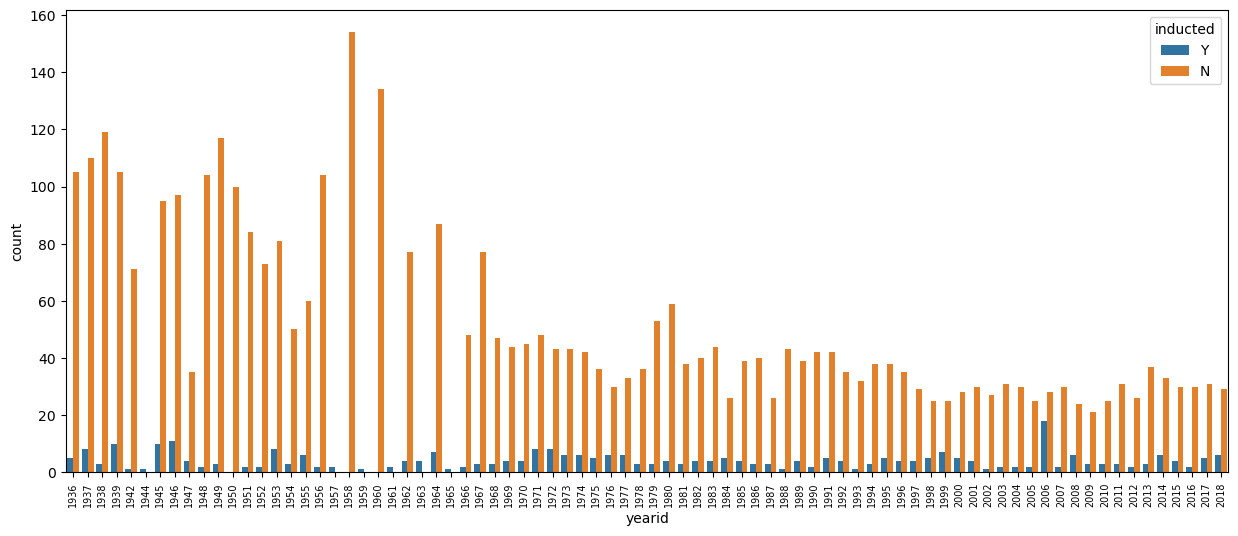

In [5]:
#Count of HOFs by year

plt.figure(figsize=(15,6))
hof_countplot = sns.countplot(x='yearid',data=hof,hue='inducted')

hof_countplot.set_xticks(hof_countplot.get_xticks(), hof_countplot.get_xticklabels(), rotation = 90, ha = 'center', fontsize = 'x-small');

### Observation : 1958 was the year with maximum hall of fame values but no one was inducted.

### Reason: In 1958, no players received the required 75% of BBWAA ballots for election to the Hall. The top vote getter was future electee Max Carey, who was named by 51.1% of the writers. Because the Veterans Committee held no vote, there was no induction ceremony in Cooperstown.

In [6]:
hof[hof['yearid']==1958].inducted.value_counts()

inducted
N    154
Name: count, dtype: int64

### Observation : 2006 was the year with maximum inductions.

### More Info: In 2006, A record 18 inductees made up the largest single class in history.

In [7]:
inducted = hof[hof['inducted']=='Y']

In [8]:
inducted.yearid.value_counts()

yearid
2006    18
1946    11
1939    10
1945    10
1972     8
        ..
2002     1
1959     1
1965     1
1942     1
1993     1
Name: count, Length: 77, dtype: int64

## Analysis 2 : 

### Table: Salaries and Teams

In [9]:
sal = pd.read_csv(r"C:\Users\thakk\Desktop\USU\Spring 2024\DSP\Project 1\baseball\core\Salaries.csv")

In [10]:
sal.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [11]:
#lets look at the mean salaries over the years
sal_by_year = sal.groupby(by='yearID').agg({'salary':'mean'}).reset_index()
new_columns = ['yearID','mean_salary']
sal_by_year.columns = new_columns

In [12]:
sal_by_year['mean_salary'] = pd.to_numeric(sal_by_year['mean_salary'])


In [13]:
pd.set_option('display.float_format', str)

In [14]:
sal_by_year.dtypes

yearID           int64
mean_salary    float64
dtype: object

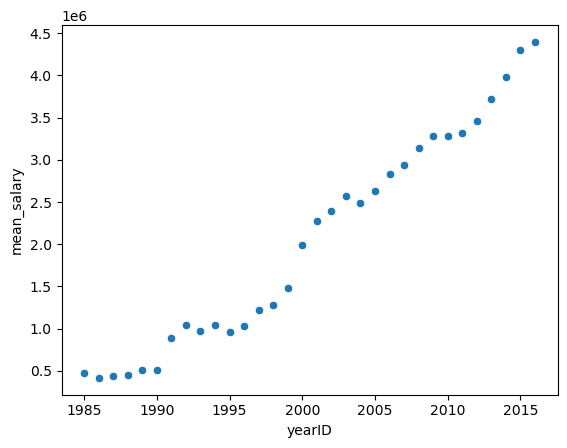

In [15]:
sns.scatterplot(x='yearID',y='mean_salary',data=sal_by_year);

### Looks like a normal behaviour, the mean salary has increased over the years. It is mainly because of the 'money' reasons like:
    - More funds 
    - Sport has become more of an entertainment thing and more and more 'viewers' keep adding up
    - More sponsor deals

In [16]:
sal

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [17]:
#lets find out teams with maximum average salary every year

sal.salary.max()

33000000

In [18]:
#mean salaries for each team by year


team_mean_sal = sal.groupby(['yearID','teamID']).agg({'salary':'mean'}).reset_index()
team_mean_sal = team_mean_sal.rename(columns={'salary': 'mean_salary'})

In [19]:
team_mean_sal

,yearID,teamID,mean_salary
0,1985,ATL,673045.4545454546
1,1985,BAL,525486.9090909091
2,1985,BOS,435902.4
3,1985,CAL,515281.9285714286
4,1985,CHA,468865.61904761905
...,...,...,...
913,2016,SLN,4614629.0322580645
914,2016,TBA,2039189.642857143
915,2016,TEX,6070300.793103448
916,2016,TOR,4782817.24137931


In [20]:
#max mean salaries by year
year_max_sal = team_mean_sal.groupby(['yearID']).agg({'mean_salary':'max'}).reset_index()

In [21]:
year_max_sal

,yearID,mean_salary
0,1985,711910.2
1,1986,660509.0357142857
2,1987,710833.3333333334
3,1988,648038.4
4,1989,710181.1071428572
5,1990,678838.5625
6,1991,1423044.8846153845
7,1992,1715461.6153846155
8,1993,1432702.0
9,1994,1646117.1


In [22]:
#join the two tables 

year_team_sal = pd.merge(team_mean_sal,year_max_sal,on=['yearID','mean_salary'])

In [23]:
year_team_sal

,yearID,teamID,mean_salary
0,1985,NYA,711910.2
1,1986,NYA,660509.0357142857
2,1987,MIN,710833.3333333334
3,1988,NYA,648038.4
4,1989,NYN,710181.1071428572
5,1990,NYN,678838.5625
6,1991,OAK,1423044.8846153845
7,1992,NYN,1715461.6153846155
8,1993,TOR,1432702.0
9,1994,ATL,1646117.1


In [40]:
#nya with its mean salaries over the years:

nya_mean_sal_over_years = year_team_sal[year_team_sal['teamID']=='NYA']

In [41]:
nya_mean_sal_over_years

,yearID,teamID,mean_salary
0,1985,NYA,711910.2
1,1986,NYA,660509.0357142857
3,1988,NYA,648038.4
12,1997,NYA,2146260.172413793
14,1999,NYA,2990839.9655172415
17,2002,NYA,4342364.931034483
18,2003,NYA,5455350.5
19,2004,NYA,6351515.517241379
20,2005,NYA,8011800.653846154
21,2006,NYA,6952252.821428572


c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yearID', ylabel='mean_salary'>

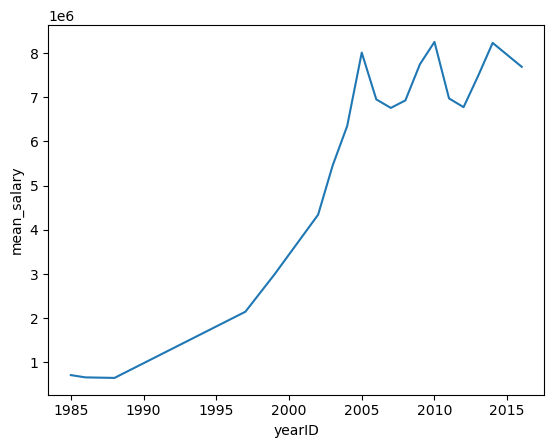

In [42]:
sns.lineplot(x='yearID',y='mean_salary',data=nya_mean_sal_over_years)

In [24]:
#teams with maximum salary and their counts of being teams with max salary from 1985-2016
team_and_sal = pd.DataFrame(year_team_sal['teamID'].value_counts()).reset_index()

In [25]:
team_and_sal

,teamID,count
0,NYA,19
1,NYN,3
2,LAN,3
3,ATL,2
4,BAL,2
5,MIN,1
6,OAK,1
7,TOR,1


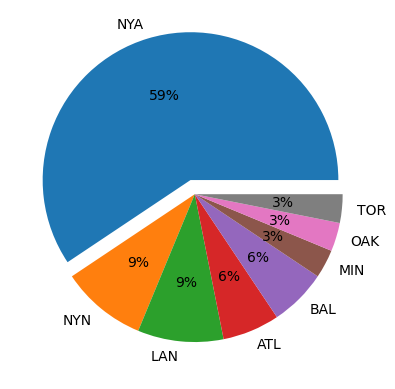

In [26]:
explode = [0.1 if teamID == 'NYA' else 0 for teamID in list(team_and_sal.teamID.unique())]

plt.pie(team_and_sal['count'],labels=team_and_sal['teamID'],explode=explode,autopct='%1.0f%%');

In [27]:
#now find out performance of NYA over the years and see if them being the team with max salary is justified by their performance, if not do the same by team size

In [28]:
teams = pd.read_csv(r"C:\Users\thakk\Desktop\USU\Spring 2024\DSP\Project 1\baseball\core\Teams.csv")

In [29]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.84,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [30]:
team_wins = teams.groupby(by='teamID').agg({'W':'sum'}).reset_index()

In [31]:
team_wins.sort_values('W',ascending=False)

,teamID,W
34,CHN,10803
92,NYA,10175
105,PIT,10158
124,SLN,9959
37,CIN,9908
...,...,...
126,SPU,2
98,PH3,2
69,KEO,1
10,BL4,0


In [32]:
nya_stats = teams[teams['teamID']=='NYA']

In [33]:
nya_stats['Rank'].value_counts()

Rank
1     47
2     22
4     13
3     12
5      9
6      5
7      3
8      2
10     1
9      1
Name: count, dtype: int64

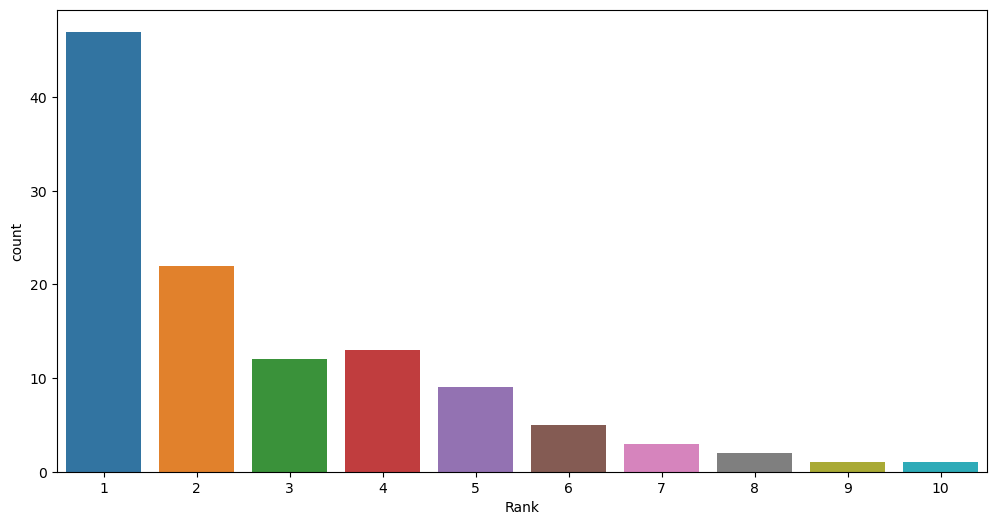

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rank',data=nya_stats);

In [35]:
#YE DISTRIBUTION PLOT KO THEEK KAR

In [36]:
# Turns out, performance could be a reason of the highest average salary. Ranked by the wins NYA is on 2nd position and when rank distribution is plotted, rank 1 has the highest
#count as compared to other counts

### Could the reason for NYA being the team with highest average salary be their performance? i.e. has their mean salary increased as a result of their better performance in terms of wins and ranks in the past?

    ### It *could* be 
        - The lineplot for median salaries for nya shows a genereal increasing trend with two dips between 2005 and 2015
        - from the years 1985-2016 NYA has been the team with maximum average salary among all teams for 59% of the time, the pie chart shows that
        - The rank distribution over the year i.e. the barplot shows that NYA has been ranked 1st 47 times and have barely left the top 5 rankings

        these are indicators of good performance and thus, one of the reasons that it is a team with maximum average salary could be their performance.